# Validation Curve

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Load data
dataObj = load_breast_cancer()
X = dataObj.data
y = dataObj.target

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    stratify=y,
    test_size=0.30,
    random_state=1)

# Constructing a pipeline object (Without PCA)
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=1, penalty='l2'))])

# Constructing a pipeline object (With PCA)
#pipe_lr = Pipeline([('scl', StandardScaler()),
#                    ('pca', PCA(n_components=2)),
#                    ('clf', LogisticRegression(random_state=1, penalty='l2'))])

In [2]:
# Get parameter names
for k, v in pipe_lr.get_params().items():
    print(f"{k:25.25s}: {str(v)}")

memory                   : None
steps                    : [('scl', StandardScaler()), ('clf', LogisticRegression(random_state=1))]
verbose                  : False
scl                      : StandardScaler()
clf                      : LogisticRegression(random_state=1)
scl__copy                : True
scl__with_mean           : True
scl__with_std            : True
clf__C                   : 1.0
clf__class_weight        : None
clf__dual                : False
clf__fit_intercept       : True
clf__intercept_scaling   : 1
clf__l1_ratio            : None
clf__max_iter            : 100
clf__multi_class         : auto
clf__n_jobs              : None
clf__penalty             : l2
clf__random_state        : 1
clf__solver              : lbfgs
clf__tol                 : 0.0001
clf__verbose             : 0
clf__warm_start          : False


In [3]:
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, val_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='clf__C', 
                param_range=param_range,
                cv=10)

/home/nnnpooh/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/nnnpooh/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [4]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

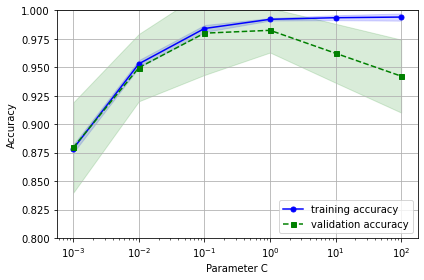

In [5]:
import matplotlib.pyplot as plt

plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(param_range,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(param_range, val_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(param_range,
                 val_mean + val_std,
                 val_mean - val_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()